In [528]:
import pandas as pd
import GeneralETL_PyFile as ETL
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tech_df = ETL.tech_df
print(tech_df)

0               NAICS2017_LABEL SEX_LABEL ETH_GROUP_LABEL RACE_GROUP_LABEL  \
1         Total for all sectors     Total           Total            Total   
2         Total for all sectors     Total           Total            Total   
3         Total for all sectors     Total           Total            Total   
4         Total for all sectors     Total           Total            Total   
5         Total for all sectors     Total           Total            Total   
...                         ...       ...             ...              ...   
5496  Industries not classified     Total           Total            Total   
5497  Industries not classified     Total           Total            Total   
5498  Industries not classified     Total           Total            Total   
5499  Industries not classified     Total           Total            Total   
5500  Industries not classified     Total           Total            Total   

0    VET_GROUP_LABEL NSFSZFI_LABEL FACTORS_P  \
1              

Filter out all unique industries. Look at questions just based on the whole market.
Also filter out all demographic groups, only looking at totals.
Done using several filter statements in the same line, in parentheses and with & in between.

In [529]:
tech_df = tech_df[tech_df['NAICS2017_LABEL'] == 'Total for all sectors']
tech_df.shape


(4400, 16)

In [530]:
tech_df = tech_df[(tech_df['SEX_LABEL'] == 'Total') & (tech_df['ETH_GROUP_LABEL'] == 'Total') & (tech_df['RACE_GROUP_LABEL'] == 'Total') & (tech_df['VET_GROUP_LABEL'] == 'Total') & (tech_df['NSFSZFI_LABEL'] == 'All firms')]
tech_df.shape
tech_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1 to 55
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAICS2017_LABEL   55 non-null     object
 1   SEX_LABEL         55 non-null     object
 2   ETH_GROUP_LABEL   55 non-null     object
 3   RACE_GROUP_LABEL  55 non-null     object
 4   VET_GROUP_LABEL   55 non-null     object
 5   NSFSZFI_LABEL     55 non-null     object
 6   FACTORS_P         55 non-null     object
 7   FACTORS_P_LABEL   55 non-null     object
 8   FIRMPDEMP         55 non-null     object
 9   FIRMPDEMP_PCT     55 non-null     object
 10  RCPPDEMP          55 non-null     object
 11  RCPPDEMP_PCT      55 non-null     object
 12  EMP               55 non-null     object
 13  EMP_PCT           55 non-null     object
 14  PAYANN            55 non-null     object
 15  PAYANN_PCT        55 non-null     object
dtypes: object(16)
memory usage: 3.9+ KB


Now we want to break into separate dataframes for each technology, so we can plot the answers for each tech, possibly on same plot.

In [531]:
AI_df = tech_df[tech_df['FACTORS_P'].str.contains('T1')]
CloudB_df = tech_df[tech_df['FACTORS_P'].str.contains('T2')]
SpecSW_df = tech_df[tech_df['FACTORS_P'].str.contains('T3')]
Robo_df = tech_df[tech_df['FACTORS_P'].str.contains('T4')]
SpecEQ_df = tech_df[tech_df['FACTORS_P'].str.contains('T5')]

# add code to adjust the CloudB_df to correct order
# take the top
topCloud = CloudB_df.iloc[:4]

# cut off the top
CloudB_df = CloudB_df.iloc[4:]
# add top to bottom
topCloud
CloudB_df = CloudB_df.append(topCloud)


In [532]:
print(AI_df['FACTORS_P_LABEL'])
print(CloudB_df['FACTORS_P_LABEL'])
print(SpecSW_df['FACTORS_P_LABEL'])
print(Robo_df['FACTORS_P_LABEL'])
print(SpecEQ_df['FACTORS_P_LABEL'])

38    Artificial Intelligence: Technology was too ex...
39    Artificial Intelligence: Technology was not ma...
40    Artificial Intelligence: Lacked access to requ...
41    Artificial Intelligence: Required data not rel...
42    Artificial Intelligence: Lacked access to requ...
43        Artificial Intelligence: Laws and regulations
44    Artificial Intelligence: Concerns regarding sa...
45    Artificial Intelligence: Lacked access to capital
46    Artificial Intelligence: Technology not applic...
47    Artificial Intelligence: No factors adversely ...
48             Artificial Intelligence: Total Reporting
Name: FACTORS_P_LABEL, dtype: object
49            Cloud-Based: Technology was too expensive
50               Cloud-Based: Technology was not mature
51          Cloud-Based: Lacked access to required data
52              Cloud-Based: Required data not reliable
53    Cloud-Based: Lacked access to required human c...
54                    Cloud-Based: Laws and regulations
55    Cloud

Cast all numeric columns to floats

In [533]:
print(AI_df.columns)
# get a list of the column names that are purely numeric so we can cast all to floats
numeric_colnames = AI_df.columns[8:]
print(numeric_colnames)

for colname in numeric_colnames:
    AI_df[colname] = AI_df[colname].astype(float)
    CloudB_df[colname] = CloudB_df[colname].astype(float)
    SpecSW_df[colname] = SpecSW_df[colname].astype(float)
    Robo_df[colname] = Robo_df[colname].astype(float)
    SpecEQ_df[colname] = SpecEQ_df[colname].astype(float)

CloudB_df


Index(['NAICS2017_LABEL', 'SEX_LABEL', 'ETH_GROUP_LABEL', 'RACE_GROUP_LABEL',
       'VET_GROUP_LABEL', 'NSFSZFI_LABEL', 'FACTORS_P', 'FACTORS_P_LABEL',
       'FIRMPDEMP', 'FIRMPDEMP_PCT', 'RCPPDEMP', 'RCPPDEMP_PCT', 'EMP',
       'EMP_PCT', 'PAYANN', 'PAYANN_PCT'],
      dtype='object', name=0)
Index(['FIRMPDEMP', 'FIRMPDEMP_PCT', 'RCPPDEMP', 'RCPPDEMP_PCT', 'EMP',
       'EMP_PCT', 'PAYANN', 'PAYANN_PCT'],
      dtype='object', name=0)


C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,FIRMPDEMP,FIRMPDEMP_PCT,RCPPDEMP,RCPPDEMP_PCT,EMP,EMP_PCT,PAYANN,PAYANN_PCT
49,Total for all sectors,Total,Total,Total,Total,All firms,T2E36R01,Cloud-Based: Technology was too expensive,255761.0,5.4,1.967320e+09,6.6,5626847.0,6.0,3.062583e+08,6.1
50,Total for all sectors,Total,Total,Total,Total,All firms,T2E36R02,Cloud-Based: Technology was not mature,30850.0,0.7,1.247278e+09,4.2,2518457.0,2.7,1.847872e+08,3.7
51,Total for all sectors,Total,Total,Total,Total,All firms,T2E36R03,Cloud-Based: Lacked access to required data,22584.0,0.5,8.306099e+08,2.8,1308095.0,1.4,1.037070e+08,2.1
52,Total for all sectors,Total,Total,Total,Total,All firms,T2E36R04,Cloud-Based: Required data not reliable,14080.0,0.3,5.603303e+08,1.9,801856.0,0.9,7.006331e+07,1.4
53,Total for all sectors,Total,Total,Total,Total,All firms,T2E36R05,Cloud-Based: Lacked access to required human c...,33862.0,0.7,1.538449e+09,5.2,2501990.0,2.7,1.917819e+08,3.8
54,Total for all sectors,Total,Total,Total,Total,All firms,T2E36R06,Cloud-Based: Laws and regulations,28084.0,0.6,9.622036e+08,3.2,1614091.0,1.7,1.360572e+08,2.7
55,Total for all sectors,Total,Total,Total,Total,All firms,T2E36R07,Cloud-Based: Concerns regarding safety and sec...,93873.0,2.0,2.085925e+09,7.0,4607533.0,4.9,3.181267e+08,6.3
1,Total for all sectors,Total,Total,Total,Total,All firms,T2E36R08,Cloud-Based: Lacked access to capital,44724.0,0.9,7.302095e+08,2.4,1469117.0,1.6,1.089239e+08,2.2
2,Total for all sectors,Total,Total,Total,Total,All firms,T2E36R09,Cloud-Based: Technology not applicable to this...,1828050.0,38.6,7.901779e+09,26.5,28474985.0,30.3,1.305852e+09,25.9
3,Total for all sectors,Total,Total,Total,Total,All firms,T2E36R10,Cloud-Based: No factors adversely affected the...,2484539.0,52.4,1.795568e+10,60.2,54492977.0,58.0,3.090559e+09,61.4


In [534]:
# list of all columns we want to graph, also a list of tech names to call for legend
labels = list(AI_df['FACTORS_P_LABEL'])
replace_labels = ['Too Expensive','Tech Not Mature','Improper Data','Unreliable Data','Insufficient Talent','Laws and Regulations','Security Concerns','Insufficient Capital','Not Applicable','No Factors','Total Reporting']


AI_df['FACTORS_P_LABEL'] = AI_df['FACTORS_P_LABEL'].replace(labels,replace_labels)
AI_df_firmpct = AI_df[['FACTORS_P_LABEL','FIRMPDEMP_PCT']]
AI_df_firmpct.set_index(['FACTORS_P_LABEL'],inplace=True)


labels = list(CloudB_df['FACTORS_P_LABEL'])
CloudB_df['FACTORS_P_LABEL'] = CloudB_df['FACTORS_P_LABEL'].replace(labels,replace_labels)
CloudB_df_firmpct = CloudB_df[['FACTORS_P_LABEL','FIRMPDEMP_PCT']]
CloudB_df_firmpct.set_index(['FACTORS_P_LABEL'],inplace=True)

labels = list(SpecSW_df['FACTORS_P_LABEL'])
SpecSW_df['FACTORS_P_LABEL'] = SpecSW_df['FACTORS_P_LABEL'].replace(labels,replace_labels)
SpecSW_df_firmpct = SpecSW_df[['FACTORS_P_LABEL','FIRMPDEMP_PCT']]
SpecSW_df_firmpct.set_index(['FACTORS_P_LABEL'],inplace=True)

labels = list(Robo_df['FACTORS_P_LABEL'])
Robo_df['FACTORS_P_LABEL'] = Robo_df['FACTORS_P_LABEL'].replace(labels,replace_labels)
Robo_df_firmpct = Robo_df[['FACTORS_P_LABEL','FIRMPDEMP_PCT']]
Robo_df_firmpct.set_index(['FACTORS_P_LABEL'],inplace=True)

labels = list(SpecEQ_df['FACTORS_P_LABEL'])
SpecEQ_df['FACTORS_P_LABEL'] = SpecEQ_df['FACTORS_P_LABEL'].replace(labels,replace_labels)
SpecEQ_df_firmpct = SpecEQ_df[['FACTORS_P_LABEL','FIRMPDEMP_PCT']]
SpecEQ_df_firmpct.set_index(['FACTORS_P_LABEL'],inplace=True)

C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [535]:
print(CloudB_df['FIRMPDEMP_PCT'])
print(Robo_df)

49      5.4
50      0.7
51      0.5
52      0.3
53      0.7
54      0.6
55      2.0
1       0.9
2      38.6
3      52.4
4     100.0
Name: FIRMPDEMP_PCT, dtype: float64
0         NAICS2017_LABEL SEX_LABEL ETH_GROUP_LABEL RACE_GROUP_LABEL  \
16  Total for all sectors     Total           Total            Total   
17  Total for all sectors     Total           Total            Total   
18  Total for all sectors     Total           Total            Total   
19  Total for all sectors     Total           Total            Total   
20  Total for all sectors     Total           Total            Total   
21  Total for all sectors     Total           Total            Total   
22  Total for all sectors     Total           Total            Total   
23  Total for all sectors     Total           Total            Total   
24  Total for all sectors     Total           Total            Total   
25  Total for all sectors     Total           Total            Total   
26  Total for all sectors     Total     

Now merge into all industries with good column names

In [536]:
TotalInd_df_firmpct = AI_df_firmpct
print(TotalInd_df_firmpct)
TotalInd_df_firmpct.columns = ['Artificial Intelligence']
TotalInd_df_firmpct['Cloud Based Technology'] = CloudB_df_firmpct['FIRMPDEMP_PCT']
TotalInd_df_firmpct['Specialized Software'] = SpecSW_df_firmpct['FIRMPDEMP_PCT']
TotalInd_df_firmpct['Robotics'] = Robo_df_firmpct['FIRMPDEMP_PCT']
TotalInd_df_firmpct['Specialized Equipment'] = SpecEQ_df_firmpct['FIRMPDEMP_PCT']
print(TotalInd_df_firmpct)

0                     FIRMPDEMP_PCT
FACTORS_P_LABEL                    
Too Expensive                   5.5
Tech Not Mature                 1.1
Improper Data                   0.5
Unreliable Data                 0.3
Insufficient Talent             0.7
Laws and Regulations            0.4
Security Concerns               0.6
Insufficient Capital            0.9
Not Applicable                 48.8
No Factors                     43.9
Total Reporting               100.0
                      Artificial Intelligence  Cloud Based Technology  \
FACTORS_P_LABEL                                                         
Too Expensive                             5.5                     5.4   
Tech Not Mature                           1.1                     0.7   
Improper Data                             0.5                     0.5   
Unreliable Data                           0.3                     0.3   
Insufficient Talent                       0.7                     0.7   
Laws and Regulations 

C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'Percent of Health Firms (%)')

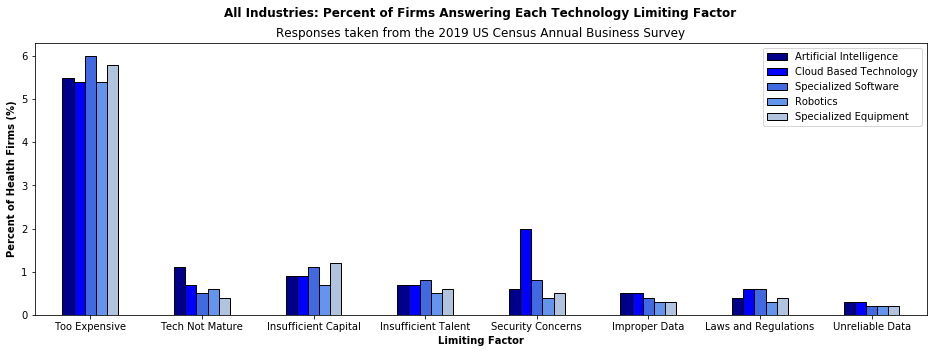

In [537]:
color_list = ['darkblue','blue','royalblue','cornflowerblue','lightsteelblue']
TotalInd_df_firmpct.drop(['Total Reporting','No Factors','Not Applicable'],axis=0,inplace=True)
TotalInd_df_firmpctsorted = TotalInd_df_firmpct.sort_values(by='Artificial Intelligence',ascending=False)
TotalInd_df_firmpctsorted.plot(kind='bar',color=color_list,figsize=(16,5),rot=0,edgecolor='black',title='Responses taken from the 2019 US Census Annual Business Survey')
plt.suptitle('All Industries: Percent of Firms Answering Each Technology Limiting Factor',fontweight='bold',x=0.512)
plt.xlabel('Limiting Factor',fontweight='bold')
plt.ylabel('Percent of Health Firms (%)',fontweight='bold')

Now let's examine the annual payrolls and market shares of companies that checked each factor.

In [538]:
# do same as above but with annual payroll table
AI_df_payann = AI_df[['FACTORS_P_LABEL','PAYANN']]
AI_df_payann.set_index(['FACTORS_P_LABEL'],inplace=True)


CloudB_df_payann = CloudB_df[['FACTORS_P_LABEL','PAYANN']]
CloudB_df_payann.set_index(['FACTORS_P_LABEL'],inplace=True)

SpecSW_df_payann = SpecSW_df[['FACTORS_P_LABEL','PAYANN']]
SpecSW_df_payann.set_index(['FACTORS_P_LABEL'],inplace=True)

Robo_df_payann = Robo_df[['FACTORS_P_LABEL','PAYANN']]
Robo_df_payann.set_index(['FACTORS_P_LABEL'],inplace=True)

SpecEQ_df_payann = SpecEQ_df[['FACTORS_P_LABEL','PAYANN']]
SpecEQ_df_payann.set_index(['FACTORS_P_LABEL'],inplace=True)

# do the same for a market share percent table
AI_df_marketshare = AI_df[['FACTORS_P_LABEL','RCPPDEMP_PCT']]
AI_df_marketshare.set_index(['FACTORS_P_LABEL'],inplace=True)


CloudB_df_marketshare = CloudB_df[['FACTORS_P_LABEL','RCPPDEMP_PCT']]
CloudB_df_marketshare.set_index(['FACTORS_P_LABEL'],inplace=True)

SpecSW_df_marketshare = SpecSW_df[['FACTORS_P_LABEL','RCPPDEMP_PCT']]
SpecSW_df_marketshare.set_index(['FACTORS_P_LABEL'],inplace=True)

Robo_df_marketshare = Robo_df[['FACTORS_P_LABEL','RCPPDEMP_PCT']]
Robo_df_marketshare.set_index(['FACTORS_P_LABEL'],inplace=True)

SpecEQ_df_marketshare = SpecEQ_df[['FACTORS_P_LABEL','RCPPDEMP_PCT']]
SpecEQ_df_marketshare.set_index(['FACTORS_P_LABEL'],inplace=True)

In [539]:
# create full data frames
TotalInd_df_payann = AI_df_payann
TotalInd_df_payann.columns = ['Artificial Intelligence']
TotalInd_df_payann['Cloud Based Technology'] = CloudB_df_payann['PAYANN']
TotalInd_df_payann['Specialized Software'] = SpecSW_df_payann['PAYANN']
TotalInd_df_payann['Robotics'] = Robo_df_payann['PAYANN']
TotalInd_df_payann['Specialized Equipment'] = SpecEQ_df_payann['PAYANN']

TotalInd_df_marketshare = AI_df_marketshare
TotalInd_df_marketshare.columns = ['Artificial Intelligence']
TotalInd_df_marketshare['Cloud Based Technology'] = CloudB_df_marketshare['RCPPDEMP_PCT']
TotalInd_df_marketshare['Specialized Software'] = SpecSW_df_marketshare['RCPPDEMP_PCT']
TotalInd_df_marketshare['Robotics'] = Robo_df_marketshare['RCPPDEMP_PCT']
TotalInd_df_marketshare['Specialized Equipment'] = SpecEQ_df_marketshare['RCPPDEMP_PCT']

print(TotalInd_df_payann)
print(TotalInd_df_marketshare)

                      Artificial Intelligence  Cloud Based Technology  \
FACTORS_P_LABEL                                                         
Too Expensive                    3.420928e+08            3.062583e+08   
Tech Not Mature                  3.895549e+08            1.847872e+08   
Improper Data                    2.067685e+08            1.037070e+08   
Unreliable Data                  1.727123e+08            7.006331e+07   
Insufficient Talent              2.950266e+08            1.917819e+08   
Laws and Regulations             1.343942e+08            1.360572e+08   
Security Concerns                1.769275e+08            3.181267e+08   
Insufficient Capital             1.070168e+08            1.089239e+08   
Not Applicable                   1.918664e+09            1.305852e+09   
No Factors                       2.478117e+09            3.090559e+09   
Total Reporting                  5.040956e+09            5.037550e+09   

                      Specialized Software      Ro

C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'Annual Payroll of Reporting Firms ($)')

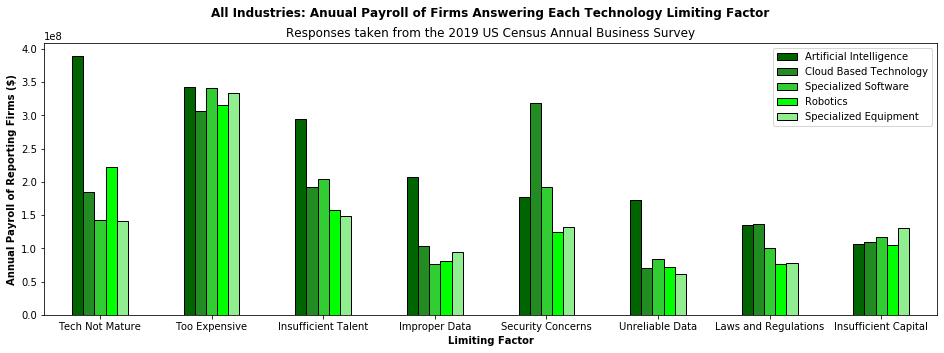

In [540]:
# now plot
color_list = ['darkgreen','forestgreen','limegreen','lime','lightgreen']
TotalInd_df_payann.drop(['Total Reporting','No Factors','Not Applicable'],axis=0,inplace=True)
TotalInd_df_payannsorted = TotalInd_df_payann.sort_values(by='Artificial Intelligence',ascending=False)
TotalInd_df_payannsorted.plot(kind='bar',color=color_list,rot=0,edgecolor='black',figsize=(16,5),title='Responses taken from the 2019 US Census Annual Business Survey')
plt.suptitle('All Industries: Anuual Payroll of Firms Answering Each Technology Limiting Factor',fontweight='bold',x=0.512)
plt.xlabel('Limiting Factor',fontweight='bold')
plt.ylabel('Annual Payroll of Reporting Firms ($)',fontweight='bold')

Final plot of marketshare percentage of firms that select each factor

C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'Percent Market Share of Reporting Firms (%)')

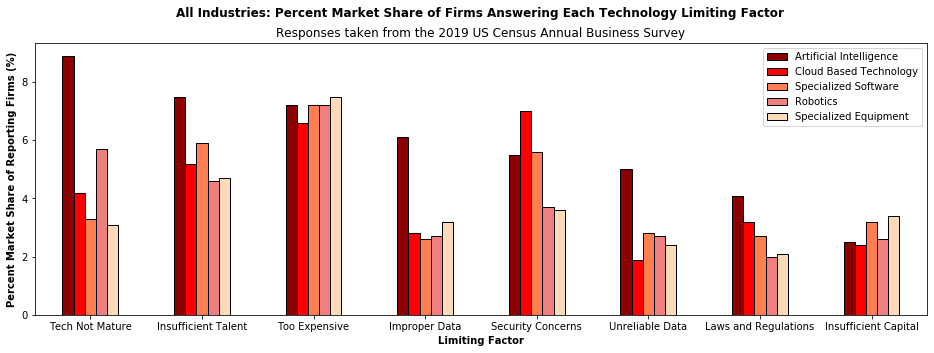

In [541]:
color_list = ['darkred','r','coral','lightcoral','peachpuff']
TotalInd_df_marketshare.drop(['Total Reporting','No Factors','Not Applicable'],axis=0,inplace=True)
TotalInd_df_marketsharesorted = TotalInd_df_marketshare.sort_values(by='Artificial Intelligence',ascending=False)
TotalInd_df_marketsharesorted.plot(kind='bar',color=color_list,rot=0,edgecolor='black',figsize=(16,5),title='Responses taken from the 2019 US Census Annual Business Survey')
plt.suptitle('All Industries: Percent Market Share of Firms Answering Each Technology Limiting Factor',fontweight='bold',x=0.512)
plt.xlabel('Limiting Factor',fontweight='bold')
plt.ylabel('Percent Market Share of Reporting Firms (%)',fontweight='bold')